In [ ]:
!pip install torch torchvision einops beartype classifier-free-guidance-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/lucidrains/robotic-transformer-pytorch
%cd robotic-transformer-pytorch

Cloning into 'robotic-transformer-pytorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 188 (delta 87), reused 79 (delta 69), pack-reused 89 (from 1)
Receiving objects: 100% (188/188), 164.11 KiB | 7.13 MiB/s, done.
Resolving deltas: 100% (131/131), done.
/content/robotic-transformer-pytorch


In [ ]:
import torch
from PIL import Image
from torchvision import transforms
from robotic_transformer_pytorch import RT1, MaxViT  # Ensure correct import of MaxViT

# Initialize the MaxViT model (or any other Vision Transformer) from the repository
vit_model = MaxViT(
    dim=512,           # Dimension size of the model
    depth=(2, 2, 5, 2),  # Example depth values, adjust as needed
    dim_head=32,       # Dimension of heads for multi-head attention
    window_size=7,     # Size of local window attention
    mbconv_expansion_rate=4,  # Expansion rate for MBConv blocks
    num_classes=1000   # Example class size, adjust as necessary
)

In [ ]:
model = RT1(vit=vit_model)

config.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# def preprocess_image(image_path):
#     preprocess = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     img = Image.open(image_path)
#     img = preprocess(img).unsqueeze(0)  # Add batch dimension
#     return img


In [ ]:
# Image preprocessing function
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize the image to 224x224
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img = Image.open(image_path)
    img = preprocess(img).unsqueeze(0)  # Add batch dimension, shape: [1, 3, 224, 224]

    # Add an additional dimension for the 'frames', shape becomes: [1, 3, 1, 224, 224]
    img = img.unsqueeze(2)  # Add frame dimension

    return img


In [ ]:
def preprocess_prompt(prompt):
    return [prompt]  # Simply return the prompt as a list of strings


In [ ]:
# def process_image_with_prompt(image_path, prompt):
#     img_tensor = preprocess_image(image_path)
#     prompt_list = preprocess_prompt(prompt)  # Return list of strings

#     # Run through the model
#     output = model(img_tensor, texts=prompt_list)  # Pass list of strings instead of tensors

#     # Convert output to image (adjust as necessary)
#     processed_image = transforms.ToPILImage()(output.squeeze(0).detach())
#     return processed_image

In [ ]:
def process_image_with_prompt(image_path, prompt):
    img_tensor = preprocess_image(image_path)
    prompt_list = preprocess_prompt(prompt)  # Return list of strings

    # Run through the model
    output = model(img_tensor, texts=prompt_list)  # Pass list of strings instead of tensors

    # Check if the output tensor is valid
    print("Output Tensor:", output)  # Print the output to inspect it
    print("Output Shape:", output.shape)  # Check the shape of the output tensor

    # Convert output to image (adjust as necessary)
    processed_image = transforms.ToPILImage()(output.squeeze(0).detach())
    return processed_image


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving hs1.jpg to hs1.jpg


In [ ]:
image_path = list(uploaded.keys())[0]

In [ ]:
# Provide the prompt
prompt = "Find the TV"

In [ ]:
processed_image = process_image_with_prompt(image_path, prompt)
processed_image.show()

Output Tensor: tensor([[[[ 7.7624e-01, -9.7747e-02,  6.0098e-01,  ...,  1.0265e-01,
           -1.0123e+00,  1.4237e-01],
          [-2.3753e-01,  1.2675e+00, -2.8579e-01,  ..., -8.1811e-02,
           -7.3026e-01, -4.5505e-01],
          [-6.8589e-01,  2.2721e-01,  8.0764e-02,  ..., -1.8509e-01,
            7.0141e-01,  1.0050e-01],
          ...,
          [ 1.0133e+00,  1.2616e+00, -2.4749e-01,  ..., -3.0101e-01,
            7.9101e-01,  3.2538e-01],
          [ 4.1801e-01,  9.0313e-02,  1.8314e-01,  ...,  2.1527e-01,
           -1.3797e+00,  1.5236e-05],
          [ 2.4064e-01,  3.6804e-01,  3.8309e-01,  ...,  9.0023e-02,
            6.3802e-01, -3.1841e-01]]]], grad_fn=<ViewBackward0>)
Output Shape: torch.Size([1, 1, 11, 256])


In [ ]:
from IPython.display import display

In [ ]:
display(processed_image)

In [ ]:
# import matplotlib.pyplot as plt

# def visualize_tensor(tensor):
#     # Remove the batch and channel dimensions (assuming shape [1, 1, 11, 256])
#     tensor = tensor.squeeze(0).squeeze(0)  # Shape becomes [11, 256]

#     # Visualize one of the feature maps (you can loop over all 11 or select one)
#     plt.imshow(tensor.detach().cpu().numpy(), cmap='viridis')
#     plt.colorbar()
#     plt.show()

# # Visualize the output tensor
# visualize_tensor(output)


Saving hs1.jpg to hs1 (1).jpg
Output Tensor: tensor([[[[ 0.7216, -0.0876,  0.5615,  ...,  0.1479, -1.0080,  0.1747],
          [-0.1941,  1.2668, -0.3107,  ..., -0.1365, -0.7607, -0.4598],
          [-0.7078,  0.2087,  0.0511,  ..., -0.2094,  0.6855,  0.1418],
          ...,
          [ 0.9852,  1.2881, -0.2312,  ..., -0.3730,  0.8176,  0.3325],
          [ 0.4181,  0.0649,  0.2247,  ...,  0.2366, -1.4414,  0.0475],
          [ 0.2268,  0.3985,  0.3677,  ...,  0.0539,  0.6518, -0.3218]]]],
       grad_fn=<ViewBackward0>)
Output Shape: torch.Size([1, 1, 11, 256])


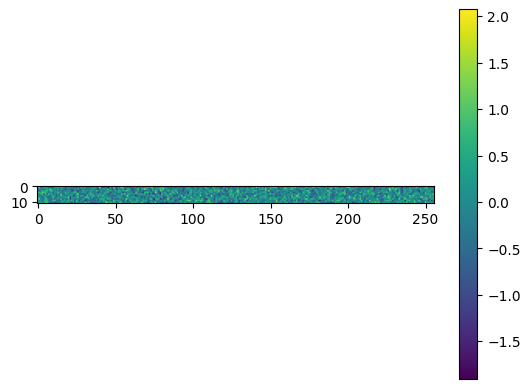

In [ ]:
import matplotlib.pyplot as plt

# Update the function to return both the processed image and the output tensor
def process_image_with_prompt(image_path, prompt):
    img_tensor = preprocess_image(image_path)
    prompt_list = preprocess_prompt(prompt)  # Return list of strings

    # Run through the model
    output = model(img_tensor, texts=prompt_list)  # Pass list of strings instead of tensors

    # Check if the output tensor is valid
    print("Output Tensor:", output)  # Print the output to inspect it
    print("Output Shape:", output.shape)  # Check the shape of the output tensor

    # Convert output to image (adjust as necessary)
    processed_image = transforms.ToPILImage()(output.squeeze(0).detach())

    return processed_image, output  # Return both the processed image and the tensor

# Visualize the tensor (feature map)
def visualize_tensor(tensor):
    # Remove the batch and channel dimensions (assuming shape [1, 1, 11, 256])
    tensor = tensor.squeeze(0).squeeze(0)  # Shape becomes [11, 256]

    # Visualize one of the feature maps (you can loop over all 11 or select one)
    plt.imshow(tensor.detach().cpu().numpy(), cmap='viridis')
    plt.colorbar()
    plt.show()

# Example usage (provide your own image and prompt)
from google.colab import files

# This will prompt you to upload the image manually
uploaded = files.upload()

# Get the file path of the uploaded image
image_path = list(uploaded.keys())[0]

# Provide the prompt
prompt = "Find the TV"

# Process the image and get the output tensor
processed_image, output_tensor = process_image_with_prompt(image_path, prompt)

# Show image using IPython display method (for Colab)
from IPython.display import display
display(processed_image)

# Visualize the output tensor
visualize_tensor(output_tensor)


In [ ]:
# def visualize_feature_maps(tensor):
#     tensor = tensor.squeeze(0).squeeze(0)  # Shape: [11, 256]

#     # Visualize each of the 11 feature maps
#     for i in range(tensor.size(0)):
#         plt.imshow(tensor[i].detach().cpu().numpy(), cmap='viridis')
#         plt.colorbar()
#         plt.title(f"Feature Map {i+1}")
#         plt.show()

# visualize_feature_maps(output_tensor)


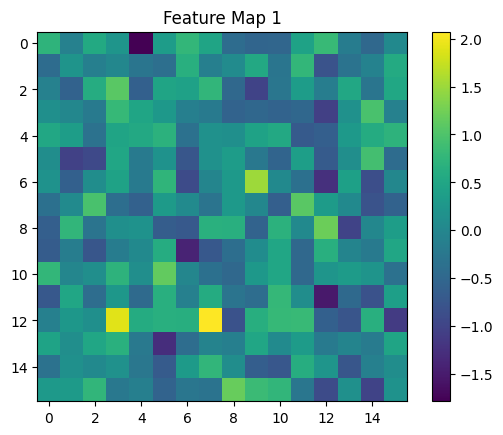

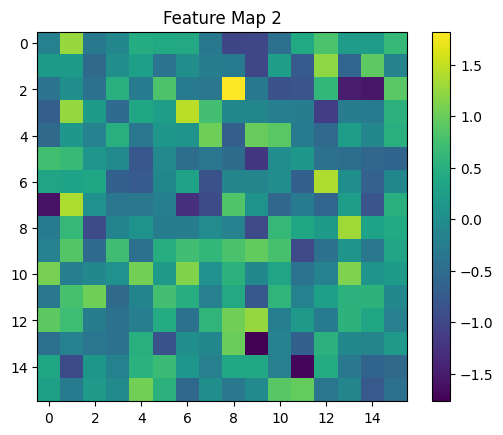

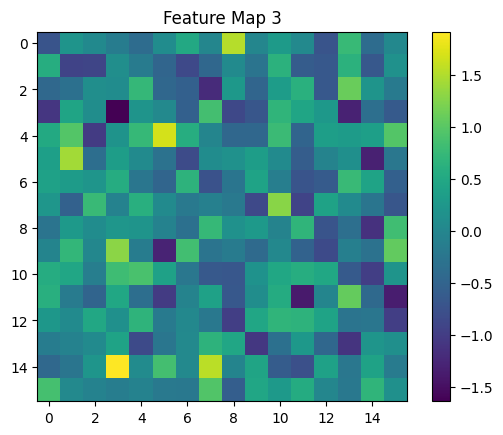

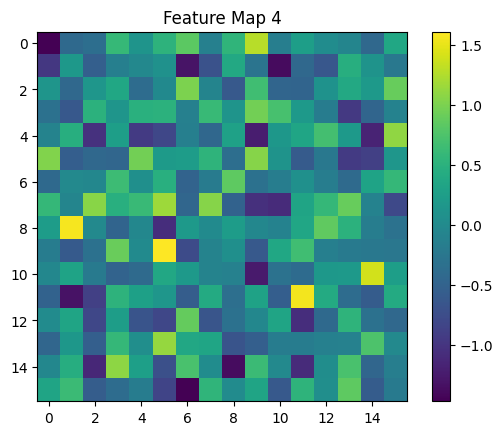

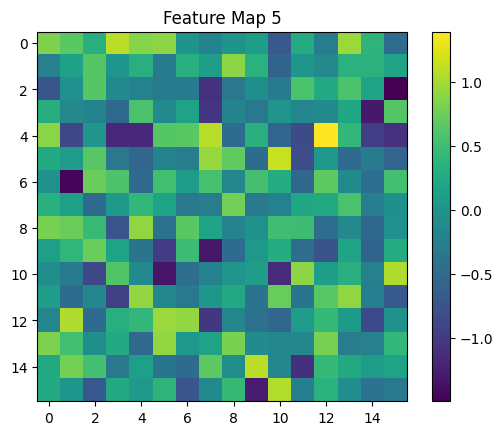

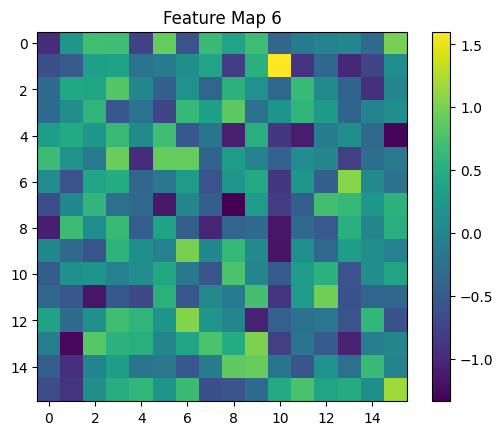

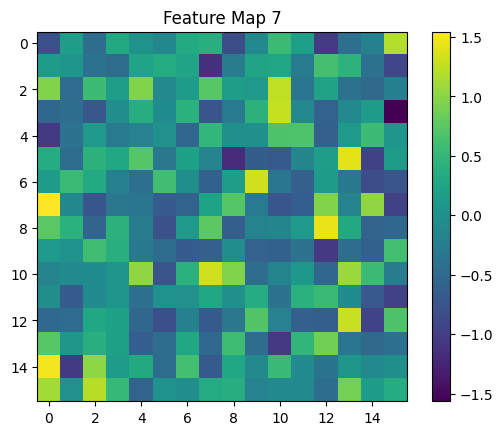

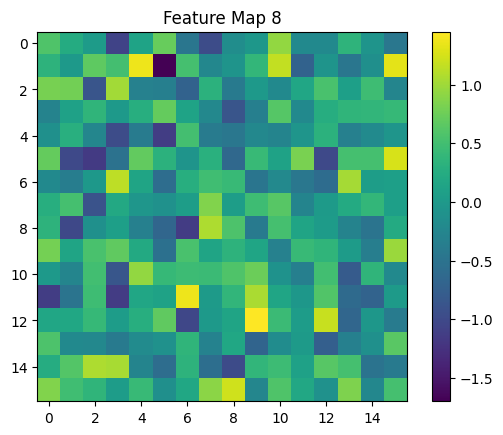

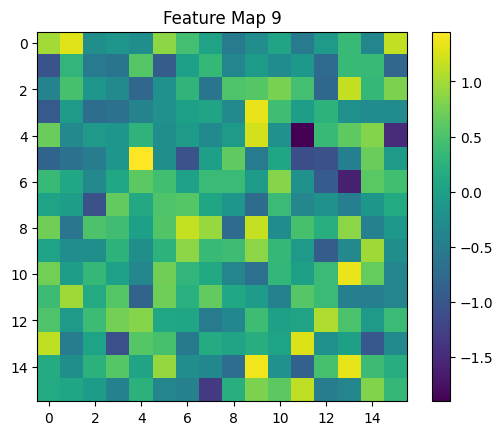

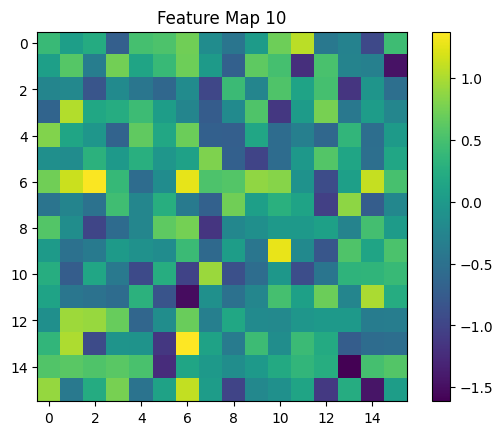

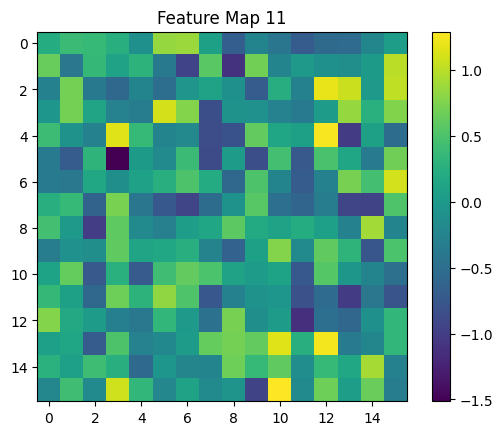

In [ ]:
def visualize_feature_maps(tensor):
    tensor = tensor.squeeze(0).squeeze(0)  # Shape: [11, 256]

    # Visualize each of the 11 feature maps
    for i in range(tensor.size(0)):
        # Reshape each 256-element feature vector to a 16x16 shape
        feature_map = tensor[i].detach().cpu().numpy().reshape(16, 16)

        plt.imshow(feature_map, cmap='viridis')
        plt.colorbar()
        plt.title(f"Feature Map {i+1}")
        plt.show()

visualize_feature_maps(output_tensor)


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


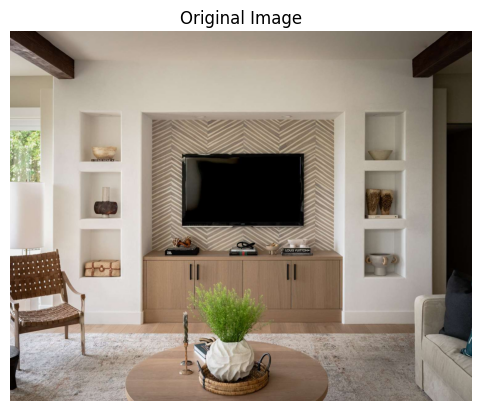

In [ ]:
def load_image(path):
    # Load and preprocess image for segmentation visualization
    image = Image.open(path)
    image = image.convert("RGB")  # Convert to RGB if not already
    return image

# Example Usage
image_path = "hs1.jpg"  # replace with your actual image path
image = load_image(image_path)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()


In [ ]:
# def generate_segmentation_mask(image, prompt):
#     # Convert image to a tensor and add the missing "frames" dimension
#     image_tensor = torch.from_numpy(np.array(image)).permute(2, 0, 1).unsqueeze(0).unsqueeze(2).float()
#     # The new shape will be [1, 3, 1, height, width]

#     # Run through RT-1 or other model layers (assuming 'rt_model' as model instance)
#     with torch.no_grad():
#         model_output = model(image_tensor, prompt)  # Example usage, replace with RT-1 functionality

#     # Post-process the model output to create a mask (assuming output is in feature format)
#     mask = model_output[0].detach().cpu().numpy()
#     mask = np.squeeze(mask)  # Remove unnecessary dimensions if any
#     mask = (mask > 0.5).astype(np.uint8)  # Convert model output to binary mask

#     return mask


In [ ]:
# def generate_segmentation_mask(image, prompt):
#     # Resize image to the expected model input size (adjust as needed, e.g., [300, 300])
#     expected_size = (300, 300)  # Adjust to the size RT-1 expects
#     image = image.resize(expected_size)

#     # Convert image to a tensor and add the missing "frames" dimension
#     image_tensor = torch.from_numpy(np.array(image)).permute(2, 0, 1).unsqueeze(0).unsqueeze(2).float()
#     # The new shape will be [1, 3, 1, height, width]

#     # Run through RT-1 or other model layers (assuming 'rt_model' as model instance)
#     with torch.no_grad():
#         model_output = model(image_tensor, prompt)  # Example usage, replace with RT-1 functionality

#     # Post-process the model output to create a mask (assuming output is in feature format)
#     mask = model_output[0].detach().cpu().numpy()
#     mask = np.squeeze(mask)  # Remove unnecessary dimensions if any
#     mask = (mask > 0.5).astype(np.uint8)  # Convert model output to binary mask

#     return mask


In [ ]:
def generate_segmentation_mask(image, prompt):
    # Resize image to match the model's expected input size
    expected_size = (224, 224)  # Try with a commonly used size
    image = image.resize(expected_size)

    # Convert image to a tensor and add the missing "frames" dimension
    image_tensor = torch.from_numpy(np.array(image)).permute(2, 0, 1).unsqueeze(0).unsqueeze(2).float()
    # The new shape will be [1, 3, 1, height, width], e.g., [1, 3, 1, 224, 224]

    # Run through RT-1 or other model layers (assuming 'rt_model' as model instance)
    with torch.no_grad():
        model_output = model(image_tensor, prompt)  # Run through the RT-1 model

    # Post-process the model output to create a mask (assuming output is in feature format)
    mask = model_output[0].detach().cpu().numpy()
    mask = np.squeeze(mask)  # Remove unnecessary dimensions if any
    mask = (mask > 0.5).astype(np.uint8)  # Convert model output to binary mask

    return mask


In [ ]:
# Example: Debugging model output
print("Input shape to RT-1:", image_tensor.shape)
try:
    with torch.no_grad():
        model_output = rt_model(image_tensor, prompt)  # Example usage, replace with RT-1 functionality
        print("Model output shape:", model_output.shape)
except Exception as e:
    print(f"Error during model processing: {e}")


NameError: name 'image_tensor' is not defined

In [ ]:
from PIL import Image
import torch
import numpy as np

def generate_segmentation_mask(image_path, prompt):
    # Load image and resize
    image = Image.open(image_path).convert("RGB")
    expected_size = (224, 224)  # Adjust to match RT-1 expected size
    image = image.resize(expected_size)

    # Convert image to tensor and add missing "frames" dimension
    image_tensor = torch.from_numpy(np.array(image)).permute(2, 0, 1).unsqueeze(0).unsqueeze(2).float()
    print("Input shape to RT-1:", image_tensor.shape)  # Debugging step

    # Assuming 'rt_model' is the RT-1 model instance
    try:
        with torch.no_grad():
            model_output = rt_model(image_tensor, prompt)  # Forward pass
            print("Model output shape:", model_output.shape)  # Debugging output shape
    except Exception as e:
        print(f"Error during model processing: {e}")
        return None

    # Post-process the model output to create a mask if no error occurs
    mask = model_output[0].detach().cpu().numpy()
    mask = np.squeeze(mask)  # Remove unnecessary dimensions
    mask = (mask > 0.5).astype(np.uint8)  # Convert to binary mask

    return mask

# Example usage
image_path = "path_to_your_image.jpg"  # Replace with actual image path
prompt = ["Identify objects relevant to the navigation task."]
mask = generate_segmentation_mask(image_path, prompt)


FileNotFoundError: [Errno 2] No such file or directory: '/content/robotic-transformer-pytorch/path_to_your_image.jpg'

In [ ]:
def overlay_segmentation(image, mask):
    # Convert image to a NumPy array
    image_np = np.array(image)

    # Create an empty color mask with the same shape as the image
    color_mask = np.zeros_like(image_np)

    # Apply a color (e.g., red) to the mask for visualization
    color_mask[mask == 1] = [255, 0, 0]  # Red color for mask overlay

    # Overlay mask on image
    overlayed_image = cv2.addWeighted(image_np, 0.7, color_mask, 0.3, 0)
    return overlayed_image


In [ ]:
# Generate segmentation mask for a prompt
prompt = ["Identify objects relevant to the navigation task."]
mask = generate_segmentation_mask(image, prompt)

# Overlay the segmentation mask on the original image
overlayed_image = overlay_segmentation(image, mask)

# Save the overlayed image
output_path = "overlayed_image_output.jpg"
cv2.imwrite(output_path, cv2.cvtColor(overlayed_image, cv2.COLOR_RGB2BGR))  # Convert to BGR for OpenCV
print(f"Overlayed image saved to {output_path}")


EinopsError: Shape mismatch, can't divide axis of length 75 in chunks of 7